#Problem 2: Basic Bidding Strategies
Evaluate the following strategies on the validation set and
discuss your results. Use the performance metrics as defined
in Section 3.3  
- **Constant bidding (Const).** Bid a constant value for all
the bid requests. The parameter is the specific constant
bid price. Explain how you can experimentally find an
optimal constant value from the training set. Provide
an analysis of your finding  
- **Random bidding (Rand).** Randomly choose a bid value
in a given range. The parameter is the upper bound
and lower bound of the random bidding range. Give
your experiment results of finding the optimal bounds
on the basis of Winning criterion #1.  
- Considering competition among homogeneous random
bidding agents. Using Rand bidding above to create n
(ranging from 50 to 100) number of bidding agents. give
your experiment results of finding the optimal bounds
on the basis of Winning criterion #2. Investigate the
difference compared to the single agent case and also
the impact of n.


#Connect to Google Drive

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Import Labries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


#Read and Prepare Data

In [0]:
#read training set
train = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/train.csv',sep=',')
train['index'] = train.index
print('Total rows: ', len(train))
#read validation set
val = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/validation.csv',sep=',')
val['index'] = val.index
print('Total rows: ', len(val))
val.head(10)

Total rows:  2430981
Total rows:  303925


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,index
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",0
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",1
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",2
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",3
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",4
5,0,6,1,f4c6a9a3b1db6da035c7e2a36d4f5e389095beca,5d3f7a140423324201f980609348422b7b9d2ba8,windows_ie,101.23.72.*,3,3,3.0,...,0,0,20,3d8f1161832704a1a34e1ccdda11a81e,241,22,b2e35064f3549d447edbbdfb1f707c8c,3427,"10063,10111",5
6,0,0,18,786a2940f225482dc04d455dc7a7fea436b02e03,d29c0eb9c94d4225736a15324000b9424518abad,windows_ie,183.131.142.*,94,97,1.0,...,0,1,0,13606a7c541dcd9ca1948875a760bb31,227,31,d29e59bf0f7f8243858b8183f14d4412,3358,"10006,10110",6
7,0,6,21,17ada861c6ed0616f88312ba0d3d76c0f95b4940,1c2afa6805a0987cd98be4212fcde0f43ea2bdaa,windows_ie,116.252.192.*,238,239,1.0,...,2,1,0,00fccc64a1ee2809348509b7ac2a97a5,227,20,b2e35064f3549d447edbbdfb1f707c8c,3427,NaN,7
8,0,0,11,6abd8ef3eb678b1afe67dc0cff0aa58413fbf29a,391c06ba8398e249d5c6e370a0ea9d1245ae9b29,windows_chrome,114.226.234.*,80,84,2.0,...,2,0,5,f65c8bdb41e9015970bac52baa813239,249,58,9be83422522025c09a44593ecd1af8ca,3476,"10057,10063,10006,10059,10110",8
9,0,5,15,442ffca310e325abc255e8ff97d9812051336acd,e7b2e7f694f4fe57a467fc3879ce4562c797edb4,windows_ie,222.172.73.*,65,73,3.0,...,0,0,50,a10c31a8ff5f42930b4c34035e523886,241,55,d29e59bf0f7f8243858b8183f14d4412,3358,"10048,10059,10006,13403,10063,10031,10111",9


#Constant Bidding
- Our intial intuition is that the optimal contant bidding price is the price with most click in training set.
- Inorder to prove our intuition we wrote some method to evaluete out intuition
- higher bid price means less impressions this may course less click

###Fatch Bidding Price with most clicks

In [0]:
def bid_price_most_click():
  bid_price_with_clicks = {}
  bid_price_list = train['payprice'].unique()#get unique bid prices
  #count bid price with most click
  for bid_price in bid_price_list:
    impressions = train[(train['payprice'] == bid_price)]#get impressions corresspoinding to a single bid price
    num = impressions['click'].sum()
    bid_price_with_clicks[bid_price] = num
  #sort dictionary based on vlaues
  bid_price_with_clicks = sorted(bid_price_with_clicks.items(), key=lambda d:d[1], reverse = True) 
  #print(bid_price_with_clicks)
  return bid_price_with_clicks[0][0]
  
bid_price_most_click()

70

## Grid Search Method On Trianing Set
- Perform grid search on training in order to find the potential optimal bid price

In [0]:
#get bid price from stratagy
budget = 6250000
def constant_bid_evaluation_train(bid_price, budget): 
  #win_impressions = val[(bid_price >= val['payprice'])]#validation set
  win_impressions = train[(bid_price >= train['payprice'])]#train set
  cost = 0
  bid_times = 0
  while bid_times < len(win_impressions) and cost <= budget-win_impressions['payprice'].iloc[bid_times]:
    cost += win_impressions['payprice'].iloc[bid_times]
    bid_times += 1
  win_impressions = win_impressions[:bid_times+1]
  clicks = win_impressions['click'].sum()
  CTR = clicks/(len(win_impressions)+1*10**-15)
  CPC = cost/(clicks+1*10**-15)
  CPM = cost/(len(win_impressions)+1*10**-15)
  print('bid price: ', bid_price,' clicks: ', clicks, ', impressions: ', len(win_impressions), 'cost: ', cost, 'CTR: ', CTR, 'CPC: ', CPC, 'CPM: ', CPM)
  return bid_price, clicks, len(win_impressions), cost, CTR, CPC, CPM

#perform grid search on train set
grid_search_df_train = pd.DataFrame(columns = ['bidprice', 'click', 'impressions', 'cost', 'CTR', 'CPC', 'CPM'])
for bid_price in range(1, 301): 
  bidprice, click, impressions, cost, CTR, CPC, CPM = constant_bid_evaluation_train(bid_price, budget)
  tmp = pd.DataFrame( [[bidprice, click, impressions, cost, CTR, CPC, CPM]], columns=['bidprice', 'click', 'impressions', 'cost', 'CTR', 'CPC', 'CPM'])
  grid_search_df_train = pd.concat([grid_search_df_train, tmp], ignore_index = True)
  

bid price:  1  clicks:  0 , impressions:  2809 cost:  2322 CTR:  0.0 CPC:  2.322e+18 CPM:  0.826628693485226
bid price:  2  clicks:  0 , impressions:  6228 cost:  9160 CTR:  0.0 CPC:  9.159999999999999e+18 CPM:  1.4707771355170198
bid price:  3  clicks:  0 , impressions:  6987 cost:  11437 CTR:  0.0 CPC:  1.1437e+19 CPM:  1.6368970946042651
bid price:  4  clicks:  2 , impressions:  17382 cost:  53017 CTR:  0.00011506155793349442 CPC:  26508.49999999999 CPM:  3.050109308480037
bid price:  5  clicks:  4 , impressions:  62513 cost:  278672 CTR:  6.39866907683202e-05 CPC:  69667.99999999999 CPM:  4.4578247724473306
bid price:  6  clicks:  32 , impressions:  77072 cost:  366026 CTR:  0.00041519618019514223 CPC:  11438.3125 CPM:  4.7491436578783475
bid price:  7  clicks:  33 , impressions:  89241 cost:  451209 CTR:  0.00036978518842236194 CPC:  13673.0 CPM:  5.056072881298954
bid price:  8  clicks:  33 , impressions:  99184 cost:  530753 CTR:  0.0003327149540248427 CPC:  16083.424242424242 C

In [0]:
grid_search_df_train.to_csv("/content/drive/My Drive/constant_search.csv")#store dataframe to csv

In [0]:
grid_search_df_train = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/constant_search.csv',sep=',')

In [0]:
#sort dataframe via click and CTR in order to find optimal bid price
grid_search_df_train.sort_values(by=['click', 'CTR'], ascending=False, inplace=True)#sort dataframe via click and CTR
grid_search_df_train.head()


,Unnamed: 0,bidprice,click,impressions,cost,CTR,CPC,CPM
24,24,25,134,404648,6249984,0.000331,46641.671642,15.445483
23,23,24,134,411911,6249991,0.000325,46641.723881,15.173159
22,22,23,132,419300,6249994,0.000315,47348.439394,14.905781
34,34,35,131,324875,6249997,0.000403,47709.900763,19.238159
25,25,26,131,400257,6249994,0.000327,47709.877863,15.614952


##Plot for Training Set

In [0]:
grid_search_df_train.sort_values(by=['bidprice'], ascending=False, inplace=True)#sort back by bid price
grid_search_df_train['CPC'][0] = 0
grid_search_df_train['CPC'][1] = 0
grid_search_df_train['CPC'][2] = 0
grid_search_df_train['CPC'][3] = 0
grid_search_df_train['CPC'][4] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ip

Text(0, 0.5, 'Bid Price')

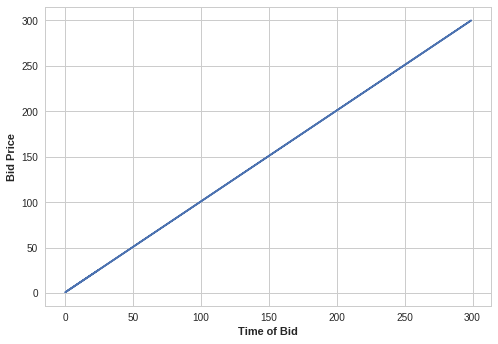

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df_train['bidprice'].plot()
plt.xlabel('Time of Bid',fontweight = 'bold')
plt.ylabel('Bid Price', fontweight = 'bold')

Text(0, 0.5, 'Click')

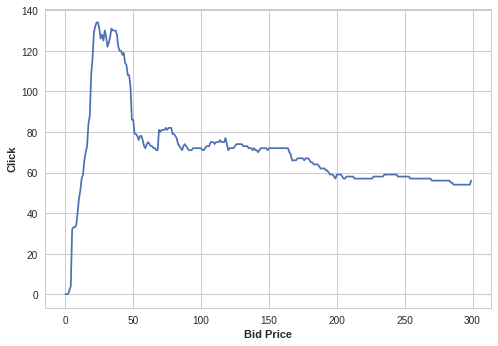

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df_train['click'].plot()
plt.xlabel('Bid Price',fontweight = 'bold')
plt.ylabel('Click', fontweight = 'bold')

Text(0, 0.5, 'Impressions')

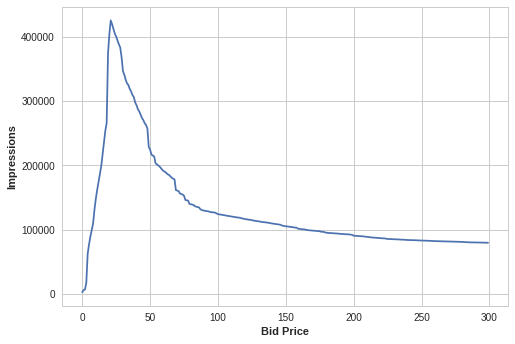

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df_train['impressions'].plot()
plt.xlabel('Bid Price',fontweight = 'bold')
plt.ylabel('Impressions', fontweight = 'bold')

Text(0, 0.5, 'Cost')

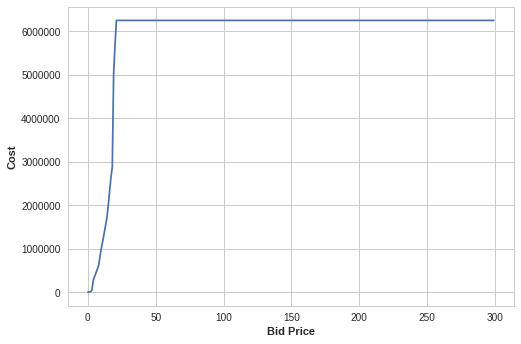

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df_train['cost'].plot()
plt.xlabel('Bid Price',fontweight = 'bold')
plt.ylabel('Cost', fontweight = 'bold')

Text(0, 0.5, 'CTR')

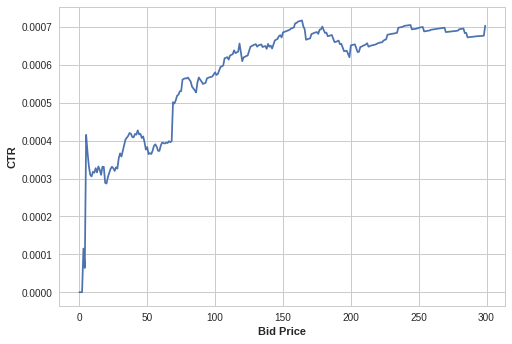

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df_train['CTR'].plot()
plt.xlabel('Bid Price',fontweight = 'bold')
plt.ylabel('CTR', fontweight = 'bold')

Text(0, 0.5, 'CPC')

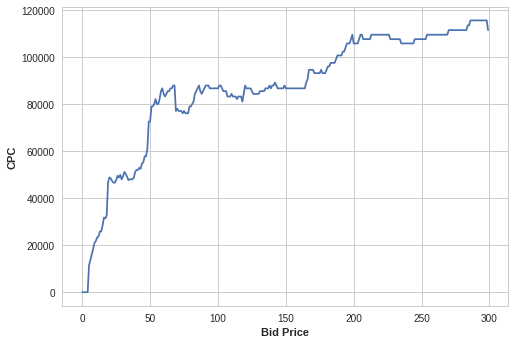

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df_train['CPC'].plot()
plt.xlabel('Bid Price',fontweight = 'bold')
plt.ylabel('CPC', fontweight = 'bold')

Text(0, 0.5, 'CPM')

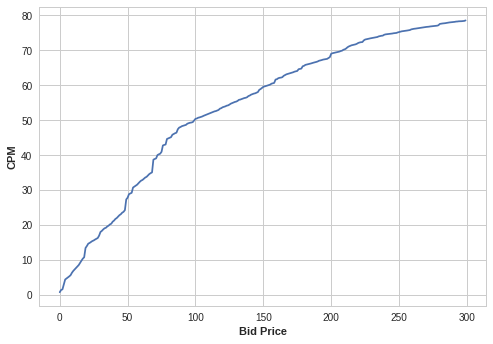

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df_train['CPM'].plot()
plt.xlabel('Bid Price',fontweight = 'bold')
plt.ylabel('CPM', fontweight = 'bold')

Text(0.5, 0, 'Time of Bid')

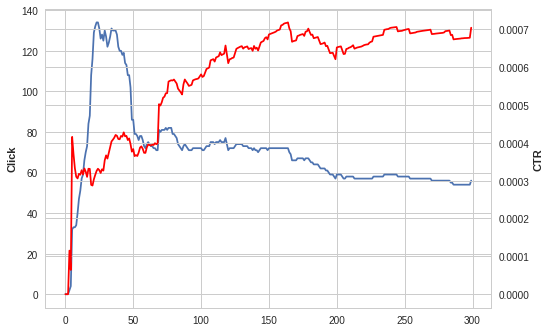

In [0]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
grid_search_df_train['click'].plot(subplots = True, ax = ax1)
ax1.set_ylabel('Click', fontweight = 'bold')

ax2 = ax1.twinx()  # this is the important function
grid_search_df_train['CTR'].plot(subplots = True, ax = ax2, color = 'r')
ax2.set_ylabel('CTR', fontweight = 'bold')
ax2.set_xlabel('Time of Bid')


##Evaluation of Stratagy

In [0]:
'''
This function firstly simulate bidding prcess for each log in valdation set
Then it using several creteria to evaluate the stratagy
'''
#get bid price from stratagy
bid_price = bid_price_most_click()
budget = 6250000
def constant_bid_evaluation(bid_price, budget): 
  win_impressions = val[(bid_price >= val['payprice'])]#validation set
  #win_impressions = train[(bid_price >= train['payprice'])]#train set
  cost = 0
  bid_times = 0
  while bid_times < len(win_impressions) and cost <= budget-win_impressions['payprice'].iloc[bid_times]:
    cost += win_impressions['payprice'].iloc[bid_times]
    bid_times += 1
  win_impressions = win_impressions[:bid_times]
  clicks = win_impressions['click'].sum()
  CTR = clicks/(len(win_impressions)+1*10**-15)
  CPC = cost/(clicks+1*10**-15)
  CPM = cost/(len(win_impressions)+1*10**-15)
  print('bid price: ', bid_price,' clicks: ', clicks, ', impressions: ', len(win_impressions), 'cost: ', cost, 'CTR: ', CTR, 'CPC: ', CPC, 'CPM: ', CPM)
  return bid_price, clicks, len(win_impressions), cost, CTR, CPC, CPM
#constant_bid_evaluation(bid_price, budget)
constant_bid_evaluation(25, budget)

bid price:  25  clicks:  16 , impressions:  60444 cost:  934656 CTR:  0.00026470782873403483 CPC:  58416.0 CPM:  15.463172523327378


(25, 16, 60444, 934656, 0.00026470782873403483, 58416.0, 15.463172523327378)

##Grid Search Provement
- Perform grid search on validation set to varify that the bid price we got from train set is optimal.

In [0]:
grid_search_df = pd.DataFrame(columns = ['bidprice', 'click', 'impressions', 'cost', 'CTR', 'CPC', 'CPM'])
for bid_price in range(1, 301): 
  bidprice, click, impressions, cost, CTR, CPC, CPM = constant_bid_evaluation(bid_price, budget)
  tmp = pd.DataFrame( [[bidprice, click, impressions, cost, CTR, CPC, CPM]], columns=['bidprice', 'click', 'impressions', 'cost', 'CTR', 'CPC', 'CPM'])
  grid_search_df = pd.concat([grid_search_df, tmp], ignore_index = True)
grid_search_df.head()

bid price:  1  clicks:  0 , impressions:  373 cost:  291 CTR:  0.0 CPC:  2.91e+17 CPM:  0.7801608579088471
bid price:  2  clicks:  0 , impressions:  851 cost:  1247 CTR:  0.0 CPC:  1.247e+18 CPM:  1.4653349001175089
bid price:  3  clicks:  0 , impressions:  943 cost:  1523 CTR:  0.0 CPC:  1.523e+18 CPM:  1.6150583244962884
bid price:  4  clicks:  0 , impressions:  2176 cost:  6455 CTR:  0.0 CPC:  6.455e+18 CPM:  2.966452205882353
bid price:  5  clicks:  0 , impressions:  7833 cost:  34740 CTR:  0.0 CPC:  3.4739999999999996e+19 CPM:  4.435082343929529
bid price:  6  clicks:  4 , impressions:  9624 cost:  45486 CTR:  0.00041562759767248546 CPC:  11371.499999999998 CPM:  4.726309226932669
bid price:  7  clicks:  4 , impressions:  11103 cost:  55839 CTR:  0.00036026299198414844 CPC:  13959.749999999996 CPM:  5.029181302350716
bid price:  8  clicks:  4 , impressions:  12373 cost:  65999 CTR:  0.0003232845712438374 CPC:  16499.749999999996 CPM:  5.334114604380506
bid price:  9  clicks:  4 , 

,bidprice,click,impressions,cost,CTR,CPC,CPM
0,1,0,373,291,0.0,2.910000e+17,0.780161
1,2,0,851,1247,0.0,1.247000e+18,1.465335
2,3,0,943,1523,0.0,1.523000e+18,1.615058
3,4,0,2176,6455,0.0,6.455000e+18,2.966452
4,5,0,7833,34740,0.0,3.474000e+19,4.435082


In [0]:
grid_search_df['CPC'][0] = 0
grid_search_df['CPC'][1] = 0
grid_search_df['CPC'][2] = 0
grid_search_df['CPC'][3] = 0
grid_search_df['CPC'][4] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-p

##Find Optimal Bid From Grid Search


In [0]:
grid_search_df.sort_values(by=['click', 'CTR'], ascending=False, inplace=True)#sort dataframe via click and CTR
grid_search_df.head()
#we can see that bid price 79 is the optimal one with highest click and highest CTR

,bidprice,click,impressions,cost,CTR,CPC,CPM
78,79,68,145916,6249957,0.000466,91911.132353,42.832568
76,77,68,146864,6249992,0.000463,91911.647059,42.556324
88,89,67,131020,6249954,0.000511,93282.895522,47.702290
80,81,67,139927,6249972,0.000479,93283.164179,44.665947
77,78,67,146311,6249993,0.000458,93283.477612,42.717178


##Plot for Grid Search

Text(0, 0.5, 'Bid Price')

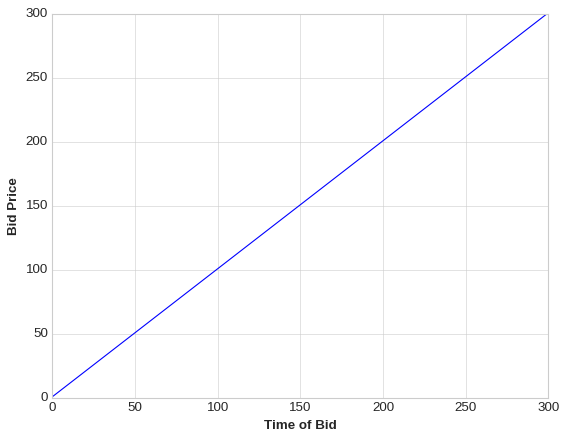

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df['bidprice'].plot()
plt.xlabel('Time of Bid',fontweight = 'bold')
plt.ylabel('Bid Price', fontweight = 'bold')

Text(0, 0.5, 'Click')

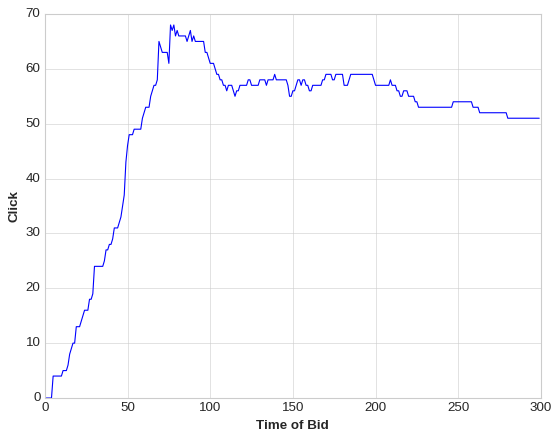

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df['click'].plot()
plt.xlabel('Time of Bid', fontweight = 'bold')
plt.ylabel('Click', fontweight = 'bold')

Text(0, 0.5, 'Cost')

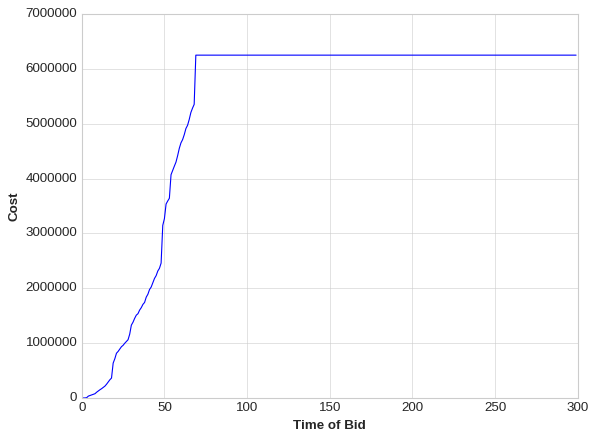

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df['cost'].plot()
plt.xlabel('Time of Bid', fontweight = 'bold')
plt.ylabel('Cost', fontweight = 'bold')


Text(0, 0.5, 'Impressions')

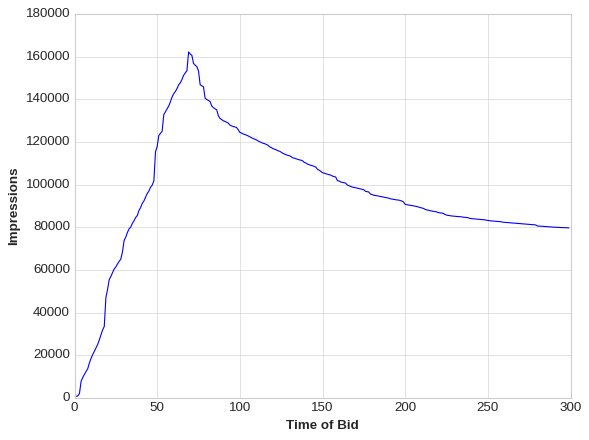

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df['impressions'].plot()
plt.xdlabel('Time of Bid', fontweight = 'bold')
plt.ylabel('Impressions', fontweight = 'bold')

Text(0, 0.5, 'CTR')

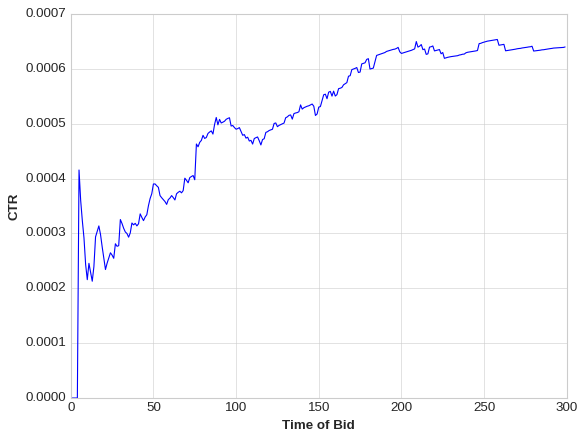

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df['CTR'].plot()
plt.xlabel('Time of Bid', fontweight = 'bold')
plt.ylabel('CTR', fontweight = 'bold')

Text(0, 0.5, 'CPC')

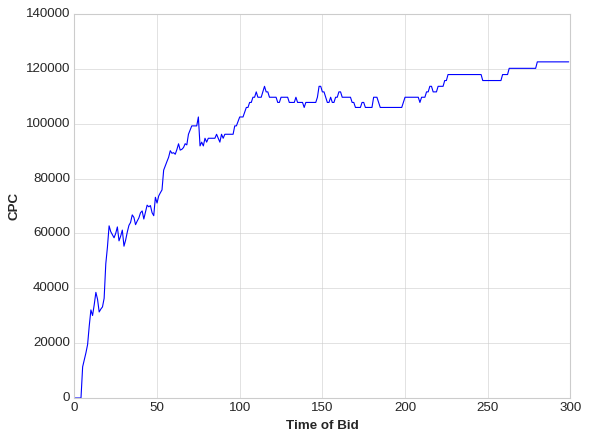

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df['CPC'].plot()
plt.xlabel('Time of Bid', fontweight = 'bold')
plt.ylabel('CPC', fontweight = 'bold')

Text(0, 0.5, 'CPM')

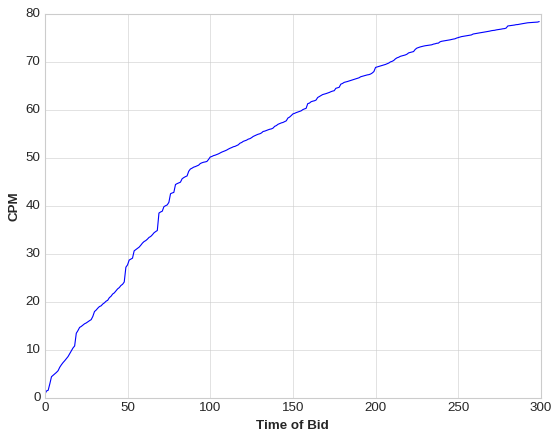

In [0]:
plt.style.use('seaborn-whitegrid')
grid_search_df['CPM'].plot()
plt.xlabel('Time of Bid', fontweight = 'bold')
plt.ylabel('CPM', fontweight = 'bold')

Text(0.5, 0, 'Time of Bid')

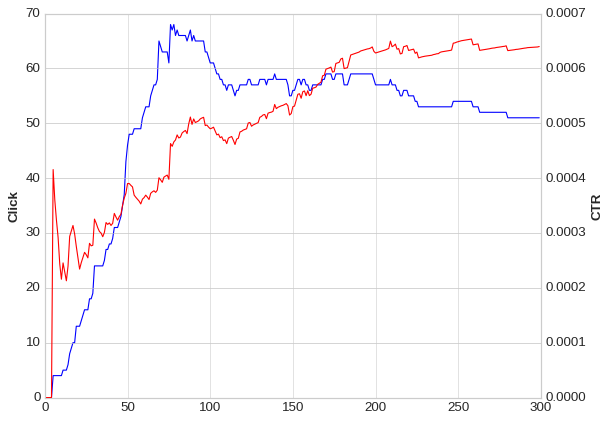

In [0]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
grid_search_df['click'].plot(subplots = True, ax = ax1)
ax1.set_ylabel('Click', fontweight = 'bold')

ax2 = ax1.twinx()  # this is the important function
grid_search_df['CTR'].plot(subplots = True, ax = ax2, color = 'r')
ax2.set_ylabel('CTR', fontweight = 'bold')
ax2.set_xlabel('Time of Bid')


#Random Bid

##Bid Parameter Optimisation

In [0]:
def random_bid_opt():
  dataset_min_bid = val['payprice'].min()
  dataset_max_bid = val['payprice'].max()
  random_opt_df = pd.DataFrame(columns = ['lower_bound','upper_bound','bidpricelist', 'click', 'impressions', 'cost', 'CTR', 'CPC', 'CPM'])
  #iterate for every combination of lower bound and upper bound
  for lower_bound in range(dataset_min_bid+1, dataset_max_bid+2, 10):
    for upper_bound in range(dataset_max_bid+1, dataset_min_bid+2, -10):
      if lower_bound < upper_bound:
        print('lower bound:', lower_bound, 'upper_bound', upper_bound)
        bid_price_list, clicks, impressions, cost, CTR, CPC, CPM = random_bid_eval(lower_bound, upper_bound)
        tmp = pd.DataFrame( [[lower_bound, upper_bound, bid_price_list, clicks, impressions, cost, CTR, CPC, CPM]], columns=['lower_bound','upper_bound','bidpricelist', 'click', 'impressions', 'cost', 'CTR', 'CPC', 'CPM'])
        random_opt_df = pd.concat([random_opt_df, tmp], ignore_index = True)
  return random_opt_df
random_opt_result_df = random_bid_opt()
random_opt_result_df.head()

  

lower bound: 1 upper_bound 301
lower bound: 1 upper_bound 291
lower bound: 1 upper_bound 281
lower bound: 1 upper_bound 271
lower bound: 1 upper_bound 261
lower bound: 1 upper_bound 251
lower bound: 1 upper_bound 241
lower bound: 1 upper_bound 231
lower bound: 1 upper_bound 221
lower bound: 1 upper_bound 211
lower bound: 1 upper_bound 201
lower bound: 1 upper_bound 191
lower bound: 1 upper_bound 181
lower bound: 1 upper_bound 171
lower bound: 1 upper_bound 161
lower bound: 1 upper_bound 151
lower bound: 1 upper_bound 141
lower bound: 1 upper_bound 131
lower bound: 1 upper_bound 121
lower bound: 1 upper_bound 111
lower bound: 1 upper_bound 101
lower bound: 1 upper_bound 91
lower bound: 1 upper_bound 81
lower bound: 1 upper_bound 71
lower bound: 1 upper_bound 61
lower bound: 1 upper_bound 51
lower bound: 1 upper_bound 41
lower bound: 1 upper_bound 31
lower bound: 1 upper_bound 21
lower bound: 1 upper_bound 11
lower bound: 11 upper_bound 301
lower bound: 11 upper_bound 291
lower bound: 11

,lower_bound,upper_bound,bidpricelist,click,impressions,cost,CTR,CPC,CPM
0,1,301,"[204, 90, 190, 238, 35, 161, 73, 163, 216, 217...",20,34141,6250175,0.000586,312508.750000,183.069477
1,1,291,"[159, 241, 39, 213, 275, 91, 100, 259, 278, 16...",22,35350,6250081,0.000622,284094.590909,176.805686
2,1,281,"[226, 103, 234, 93, 200, 57, 42, 167, 124, 147...",28,36347,6250007,0.000770,223214.535714,171.953861
3,1,271,"[268, 35, 113, 144, 188, 78, 173, 159, 181, 73...",19,37583,6250007,0.000506,328947.736842,166.298779
4,1,261,"[98, 67, 244, 220, 213, 37, 154, 64, 213, 184,...",25,38871,6250141,0.000643,250005.640000,160.791876


In [0]:
random_opt_result_df.to_csv("/content/drive/My Drive/random_search.csv")#store dataframe to csv
#!cp random_search.csv content/drive

##Read random_opt_result_df From Google Drive and Find Best Bounds Parameters

In [0]:
#read training set
random_opt_result_df = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/random_search.csv',sep=',')
print('Total rows: ', len(random_opt_result_df))
random_opt_result_df.head()

Total rows:  465


,Unnamed: 0,lower_bound,upper_bound,bidpricelist,click,impressions,cost,CTR,CPC,CPM
0,0,1,301,"[204, 90, 190, 238, 35, 161, 73, 163, 216, 217...",20,34141,6250175,0.000586,312508.750000,183.069477
1,1,1,291,"[159, 241, 39, 213, 275, 91, 100, 259, 278, 16...",22,35350,6250081,0.000622,284094.590909,176.805686
2,2,1,281,"[226, 103, 234, 93, 200, 57, 42, 167, 124, 147...",28,36347,6250007,0.000770,223214.535714,171.953861
3,3,1,271,"[268, 35, 113, 144, 188, 78, 173, 159, 181, 73...",19,37583,6250007,0.000506,328947.736842,166.298779
4,4,1,261,"[98, 67, 244, 220, 213, 37, 154, 64, 213, 184,...",25,38871,6250141,0.000643,250005.640000,160.791876


In [0]:
random_opt_result_df.sort_values(by=['click', 'CTR'], ascending=False, inplace=True)#sort dataframe via click and CTR
random_opt_result_df.head()

,Unnamed: 0,lower_bound,upper_bound,bidpricelist,click,impressions,cost,CTR,CPC,CPM
52,52,11,81,"[35, 36, 33, 37, 68, 72, 57, 37, 71, 16, 62, 7...",46,104823,5958372,0.000439,129529.826087,56.842220
50,50,11,101,"[66, 86, 15, 100, 61, 19, 82, 79, 75, 74, 42, ...",44,89498,6250058,0.000492,142046.772727,69.834611
110,110,31,71,"[65, 44, 42, 59, 48, 56, 66, 31, 50, 41, 47, 6...",42,114548,6250042,0.000367,148810.523810,54.562646
138,138,41,61,"[59, 60, 60, 45, 48, 43, 61, 51, 54, 53, 52, 6...",41,114399,6009017,0.000358,146561.390244,52.526832
108,108,31,91,"[78, 78, 40, 56, 41, 68, 48, 76, 69, 60, 67, 4...",40,92745,6250029,0.000431,156250.725000,67.389390


##Random Bid Evaluation

In [0]:
budget = 6250000#set budget
def random_bid_eval(lower_bound, upper_bound):
  cost = 0
  bid_price_list = []
  impressions = 0
  bid_times = 0
  clicks = 0
  #simulate every bid and count bid tims and cost
  while cost < budget and bid_times <= len(val)-1:
    bid_price = random.randint(lower_bound, upper_bound+1)
    bid_price_list.append(bid_price)
    if bid_times < len(val) and val['payprice'].iloc[bid_times] < bid_price:
      #print(bid_times)
      cost += bid_price
      impressions += 1
      clicks += val.iloc[bid_times]['click']
    bid_times += 1
  CTR = clicks/impressions
  CPC = cost/clicks
  CPM = cost/impressions
  #print('bid price list: ', bid_price_list,' clicks: ', clicks, ', impressions: ', impressions, 'cost: ', cost, 'CTR: ', CTR, 'CPC: ', CPC, 'CPM: ', CPM)
  return bid_price_list, clicks, impressions, cost, CTR, CPC, CPM

In [0]:
def random_bid_eval_train(lower_bound, upper_bound):
  cost = 0
  bid_price_list = []
  impressions = 0
  bid_times = 0
  clicks = 0
  #simulate every bid and count bid tims and cost
  while cost < budget and bid_times <= len(val)-1:
    bid_price = random.randint(lower_bound, upper_bound+1)
    bid_price_list.append(bid_price)
    if bid_times < len(train) and train['payprice'].iloc[bid_times] < bid_price:
      #print(bid_times)
      cost += bid_price
      impressions += 1
      clicks += train.iloc[bid_times]['click']
    bid_times += 1
  CTR = clicks/impressions
  CPC = cost/clicks
  CPM = cost/impressions
  #print('bid price list: ', bid_price_list,' clicks: ', clicks, ', impressions: ', impressions, 'cost: ', cost, 'CTR: ', CTR, 'CPC: ', CPC, 'CPM: ', CPM)
  return bid_price_list, clicks, impressions, cost, CTR, CPC, CPM

In [0]:
bid, click, impressions, cost, ctr, cpc, cpm = random_bid_eval(11, 81)
print(click)

36


##Plot for Random Stretagy

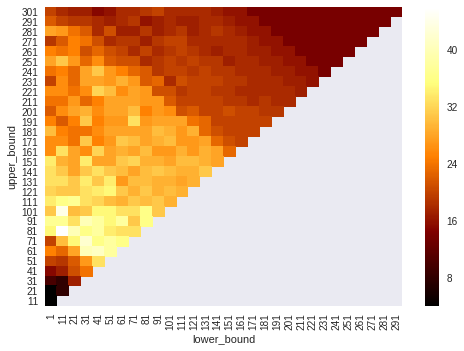

In [0]:
sub = random_opt_result_df.pivot("upper_bound", "lower_bound", "click")
ax = seaborn.heatmap(sub, cmap = 'afmhot')
plt.gca().invert_yaxis()

#Homogeneous Random Bidding Agents

In [0]:
class random_bid_agent():
  def __init__(self, lower_bound, upper_bound):
    self.lower_bound = lower_bound
    self.upper_bound = upper_bound
    self.budget = 6250000
    self.bid_price_list = []
    self.click = 0
    self.impressions = 0
    self.cost = 0
    
  def bid(self):
    bid_price = 0
    if self.cost < self.budget:
      #random.seed(self.cost*5)
      bid_price = random.randint(self.lower_bound, self.upper_bound+1)
      self.bid_price_list.append(bid_price)
    return bid_price    
  
  def win_update(self, click, bid_price):
    self.click += click
    self.impressions += 1
    self.cost += bid_price
  
agent = random_bid_agent(1,300)
print(agent.bid())

200


In [0]:
class RTB_server(): 
  def __init__(self, agent_num, lower_bound, upper_bound):
    self.AGENT_LIST = [random_bid_agent(lower_bound, upper_bound) for _ in range(agent_num)]
    self.win_agent_list = []
    self.lower_bound = lower_bound
    self.upper_bound = upper_bound
    self.agent_num = agent_num
    
  def find_winner(self, dataset, train_index_list):
    round = 0
    #np.random.seed(time.time())
    
    #agent_bid_list = list(np.random.randint(low = self.lower_bound,high = self.upper_bound, size=self.agent_num))
    while round < len(dataset):
      agent_bid_list = [agent.bid() for agent in self.AGENT_LIST]
      if len(list(set(agent_bid_list))) != 1:
        payprice = int(dataset[(dataset['index'] == train_index_list[round])]['payprice'])
        click = int(dataset[(dataset['index'] == train_index_list[round])]['click'])
        max_bid = max(agent_bid_list)
        if max_bid > payprice:
          agent_id = agent_bid_list.index(max_bid)
          self.AGENT_LIST[agent_id].win_update(click, max_bid)
          self.win_agent_list.append(agent_id)
      round += 1
      if round%10000 == 0:
        #print(round)
        print(agent_bid_list)


##Grid Search

In [0]:
multi_agent_search_df = pd.DataFrame(columns = ['lower_bound', 'upper_bound', 'click', 'impressions', 'cost'])
for lower_bound in range(1, 300, 30):
  for upper_bound in range(301, 1, -30):
    if lower_bound < upper_bound:
      train_multi, test_multi = train_test_split(val, test_size = 0.5)
      train_index_list = list(train_multi['index'])
      #print(train_index_list)
      server = RTB_server(75, lower_bound, upper_bound)
      server.find_winner(train_multi, train_index_list)
      impressions = 0
      cost = 0
      click = 0
      for agent in server.AGENT_LIST:
        click += agent.click
        impressions += agent.impressions
        cost += agent.cost
      tmp = pd.DataFrame( [[lower_bound, upper_bound, click, impressions, cost]], columns=['lower_bound','upper_bound', 'click', 'impressions', 'cost'])
      multi_agent_search_df = pd.concat([multi_agent_search_df, tmp], ignore_index = True)
      print(lower_bound, upper_bound)

[257, 160, 217, 44, 276, 140, 183, 83, 151, 292, 167, 147, 276, 210, 172, 277, 261, 20, 282, 119, 92, 186, 170, 127, 294, 10, 106, 133, 87, 257, 50, 236, 292, 148, 242, 213, 266, 34, 34, 94, 141, 237, 119, 292, 102, 150, 100, 187, 88, 83, 143, 180, 207, 234, 75, 203, 139, 71, 234, 78, 105, 32, 115, 12, 111, 64, 172, 18, 170, 165, 50, 2, 84, 148, 152]
[168, 26, 71, 201, 181, 110, 69, 276, 130, 71, 171, 38, 70, 267, 253, 129, 242, 251, 26, 135, 287, 158, 251, 26, 273, 62, 302, 266, 157, 111, 203, 220, 185, 293, 63, 140, 261, 98, 125, 253, 182, 182, 11, 159, 214, 72, 252, 248, 222, 1, 7, 103, 102, 236, 31, 149, 10, 68, 170, 171, 278, 281, 34, 84, 268, 292, 244, 216, 292, 162, 302, 4, 219, 156, 198]
[98, 199, 76, 50, 34, 57, 218, 130, 233, 77, 242, 133, 299, 104, 292, 234, 113, 56, 37, 156, 220, 267, 187, 193, 287, 36, 217, 151, 116, 168, 79, 74, 215, 117, 209, 262, 54, 271, 132, 213, 225, 245, 272, 207, 244, 54, 240, 115, 85, 104, 35, 236, 58, 107, 195, 237, 210, 167, 1, 106, 30, 178, 140

In [0]:
multi_agent_search_df.to_csv("/content/drive/My Drive/multi_agent_random_search_2.csv")#store dataframe to csv

In [0]:
multi_agent_search_df = pd.read_csv('/content/drive/My Drive/multi_agent_random_search_2.csv',sep=',')

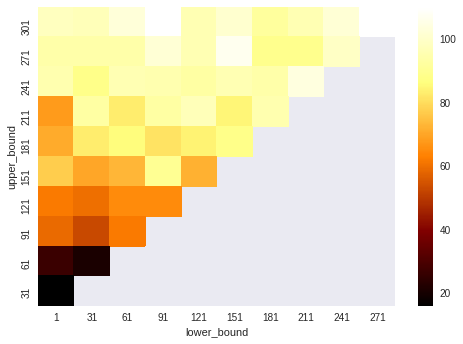

In [0]:
sub = multi_agent_search_df.pivot("upper_bound", "lower_bound", "click")
ax = seaborn.heatmap(sub, cmap = 'afmhot')
plt.gca().invert_yaxis()

In [0]:
multi_agent_search_df.sort_values(by=['click'], ascending=False, inplace=True)#sort dataframe via click and CTR
multi_agent_search_df.head()

,Unnamed: 0,lower_bound,upper_bound,click,impressions,cost
27,27,91,301,110,151902,45522832
54,54,271,301,110,151962,45877377
41,41,151,271,107,150547,40774890
51,51,211,241,104,148840,36004076
19,19,61,301,103,151880,45457265


In [0]:
lower_bound_precise = multi_agent_search_df.iloc[0]['lower_bound']
upper_ound_precise = multi_agent_search_df.iloc[0]['upper_bound']

##More Precise

In [0]:
multi_agent_search_step_20_df = pd.DataFrame(columns = ['lower_bound', 'upper_bound', 'click', 'impressions', 'cost'])
for lower_bound in range(lower_bound_precise, upper_ound_precise, 15):
  for upper_bound in range(upper_ound_precise, lower_bound_precise, -15):
    if lower_bound < upper_bound:
      train_multi, test_multi = train_test_split(val, test_size = 0.5)
      train_index_list = list(train_multi['index'])
      #print(train_index_list)
      server = RTB_server(75, lower_bound, upper_bound)
      server.find_winner(train_multi, train_index_list)
      impressions = 0
      cost = 0
      click = 0
      for agent in server.AGENT_LIST:
        click += agent.click
        impressions += agent.impressions
        cost += agent.cost
      tmp = pd.DataFrame( [[lower_bound, upper_bound, click, impressions, cost]], columns=['lower_bound','upper_bound', 'click', 'impressions', 'cost'])
      multi_agent_search_step_20_df = pd.concat([multi_agent_search_step_20_df, tmp], ignore_index = True)
      print(lower_bound, upper_bound)

[191, 174, 93, 120, 249, 175, 105, 145, 143, 94, 121, 268, 112, 248, 149, 151, 207, 92, 182, 292, 258, 235, 148, 158, 283, 145, 247, 197, 211, 216, 253, 214, 201, 122, 216, 117, 154, 196, 291, 284, 284, 135, 289, 240, 129, 93, 130, 196, 253, 158, 238, 173, 191, 292, 293, 128, 113, 122, 211, 185, 198, 245, 123, 127, 108, 162, 186, 173, 107, 207, 225, 175, 166, 254, 122]
[200, 209, 130, 112, 127, 207, 275, 119, 243, 201, 279, 235, 187, 207, 157, 160, 271, 110, 114, 289, 147, 174, 275, 192, 232, 262, 133, 248, 219, 233, 288, 264, 214, 119, 185, 301, 134, 202, 164, 263, 212, 197, 261, 301, 100, 202, 96, 97, 109, 294, 286, 94, 178, 264, 115, 302, 127, 109, 253, 261, 209, 290, 242, 262, 93, 91, 134, 94, 254, 182, 100, 92, 220, 159, 213]
[159, 298, 258, 246, 274, 167, 155, 140, 126, 299, 298, 209, 205, 145, 227, 256, 234, 221, 185, 119, 128, 286, 171, 266, 197, 227, 245, 299, 208, 260, 97, 246, 105, 212, 187, 156, 265, 189, 158, 295, 238, 270, 96, 134, 157, 203, 245, 184, 234, 112, 179, 159, 

In [0]:
multi_agent_search_step_20_df.to_csv("/content/drive/My Drive/multi_agent_random_step_20_search_2.csv")#store dataframe to csv

In [0]:
multi_agent_search_step_20_df.sort_values(by=['click'], ascending=False, inplace=True)#sort dataframe via click and CTR
n_lower_bound = multi_agent_search_step_20_df.iloc[0]['lower_bound']
n_upper_bound = multi_agent_search_step_20_df.iloc[0]['upper_bound']
multi_agent_search_step_20_df.head()

In [0]:
multi_agetn_search_step_20_df = pd.read_csv("/content/drive/My Drive/multi_agent_random_step_20_search_2.csv", sep = ',')
sub = multi_agetn_search_step_20_df.pivot("upper_bound", "lower_bound", "click")
ax = seaborn.heatmap(sub, cmap = 'afmhot')
plt.gca().invert_yaxis()

##Affection of Number of Agent

In [0]:
multi_agent_search_n_df = pd.DataFrame(columns = ['agent_num','lower_bound', 'upper_bound', 'click', 'impressions', 'cost','CTR'])
for agent_num in range(50, 100, 2):
  train_multi, test_multi = train_test_split(val, test_size = 0.5)
  train_index_list = list(train_multi['index'])
  #print(train_index_list)
  server = RTB_server(agent_num, n_lower_bound, n_upper_bound)
  server.find_winner(train_multi, train_index_list)
  impressions = 0
  cost = 0
  click = 0
  for agent in server.AGENT_LIST:
    click += agent.click
    impressions += agent.impressions
    cost += agent.cost
  CTR = click/impressions
  tmp = pd.DataFrame( [[agent_num, n_lower_bound, n_upper_bound, click, impressions, cost, CTR]], columns=['agent_num','lower_bound','upper_bound', 'click', 'impressions', 'cost','CTR'])
  multi_agent_search_n_df = pd.concat([multi_agent_search_n_df, tmp], ignore_index = True)
  print(agent_num, n_lower_bound, n_upper_bound)
  print('---------------------')

In [0]:
multi_agent_search_n_df.to_csv("/content/drive/My Drive/multi_agent_random_n_search_2.csv", index = False)#store dataframe to csv

In [0]:
multi_agent_search_n_df = pd.read_csv('/content/drive/My Drive/multi_agent_random_n_search_2.csv',sep=',')
multi_agent_search_n_df.head()

In [0]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
multi_agent_search_n_df['click'].plot(subplots = True, ax = ax1)
ax1.set_ylabel('Click', fontweight = 'bold')

ax2 = ax1.twinx()  # this is the important function
multi_agent_search_n_df['CTR'].plot(subplots = True, ax = ax2, color = 'r')
ax2.set_ylabel('CTR', fontweight = 'bold')
ax2.set_xlabel('Time of Bid')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=0)